In [12]:
%load_ext autoreload
%autoreload 1
import numpy as np
import jax.numpy as jnp
import jax.random as jrandom
from matplotlib import pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.patches as mpatches

%matplotlib widget
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams.update({'font.size': 12})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2D Brownian motion

In [2]:
def brownian_motion(T, samples, sigma=1):

    dt = T/samples

    scale = jnp.ones(samples)*sigma*jnp.sqrt(dt)

    x_random_step = scale*jrandom.normal(jrandom.PRNGKey(1), shape=[samples])
    x_random_step = x_random_step.at[0].set(0)

    y_random_step = scale*jrandom.normal(jrandom.PRNGKey(3), shape=[samples])
    y_random_step = y_random_step.at[0].set(0)

    x = jnp.cumsum(x_random_step)
    y = jnp.cumsum(y_random_step)

    return x, y

# Helper for lines

In [3]:
def get_line_collection(x:np.array, y:np.array, cmap:plt.colormaps=plt.get_cmap('copper'), alpha_min=0.02):

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    z = np.linspace(0.0, 1.0, len(x))
    alphas = np.linspace(alpha_min, 1, len(x))
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=plt.Normalize(0.0, 1.0), alpha=alphas)

    return lc

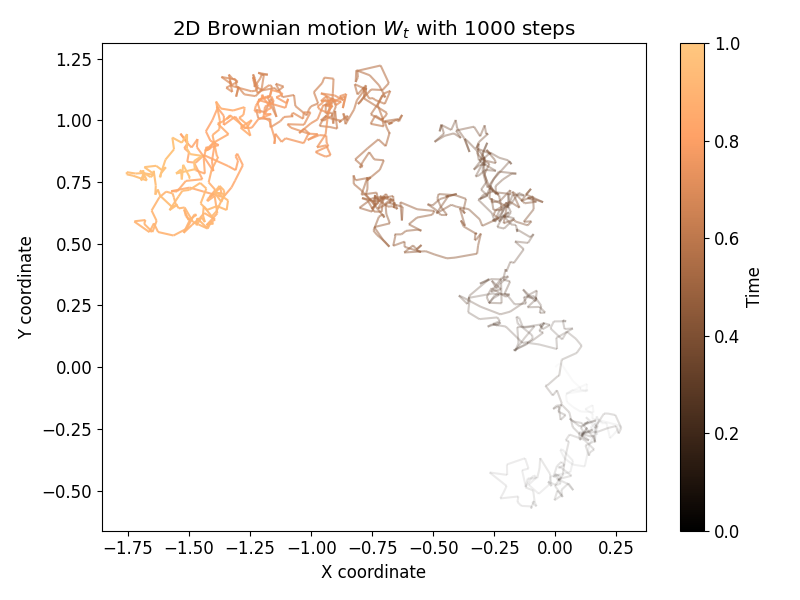

In [4]:
T = 1
n = 1000
x, y = brownian_motion(T, samples=n)

plt.figure('2d brownian motion')
plt.clf()
cmap = plt.get_cmap('copper')

lc = get_line_collection(x, y)
plt.gca().add_collection(lc)
plt.colorbar(lc).set_label('Time')

plt.gca().autoscale(enable=True, axis='both', tight=None)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate') 
plt.title(f'2D Brownian motion $W_t$ with {n} steps')
plt.tight_layout()
plt.show()

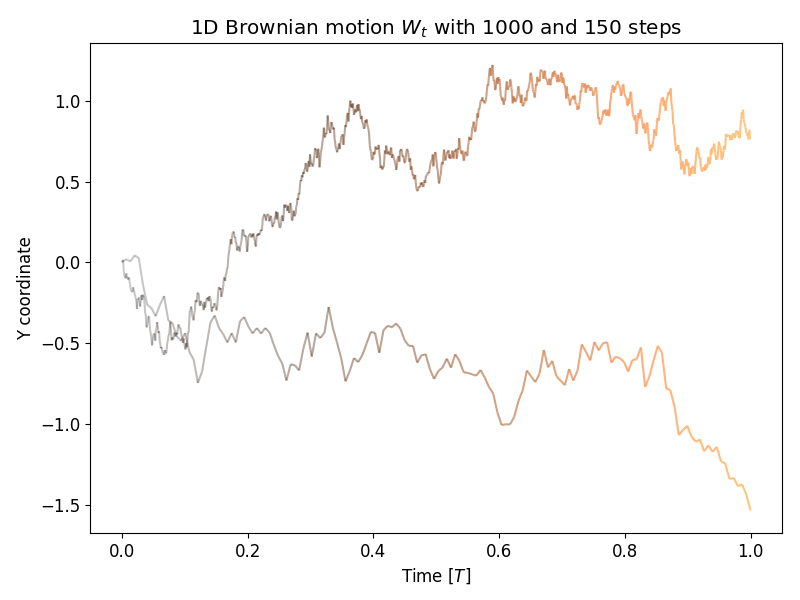

In [19]:
plt.figure('1D Brownian motion')
plt.cla()

T = 1
n1 = 1000
x, y = brownian_motion(T, samples=n1)
x = np.linspace(0, T, n1)
lc = get_line_collection(x, y, alpha_min=0.2)
plt.gca().add_collection(lc)

T = 1
n2 = 150
x, y = brownian_motion(T, samples=n2)
x = np.linspace(0, T, n2)
lc = get_line_collection(x, y, alpha_min=0.2)
plt.gca().add_collection(lc)

plt.gca().autoscale(enable=True, axis='both', tight=None)
plt.xlabel('Time [$T$]')
plt.ylabel('Y coordinate') 
plt.title(f'1D Brownian motion $W_t$ with {n1} and {n2} steps')
plt.tight_layout()
plt.show()

# Quadratic Variation
Computes QV with different sample sizes (dt)

In [4]:
T = 1
N = 70
qv_values = []
samples = []
for sample_n in np.linspace(5, 20000, N):
    x, y = brownian_motion(T, samples=int(sample_n))
    deltas = jnp.diff(y)
    qv = jnp.sum(deltas**2)
    qv_values.append(qv)
    samples.append(int(sample_n))

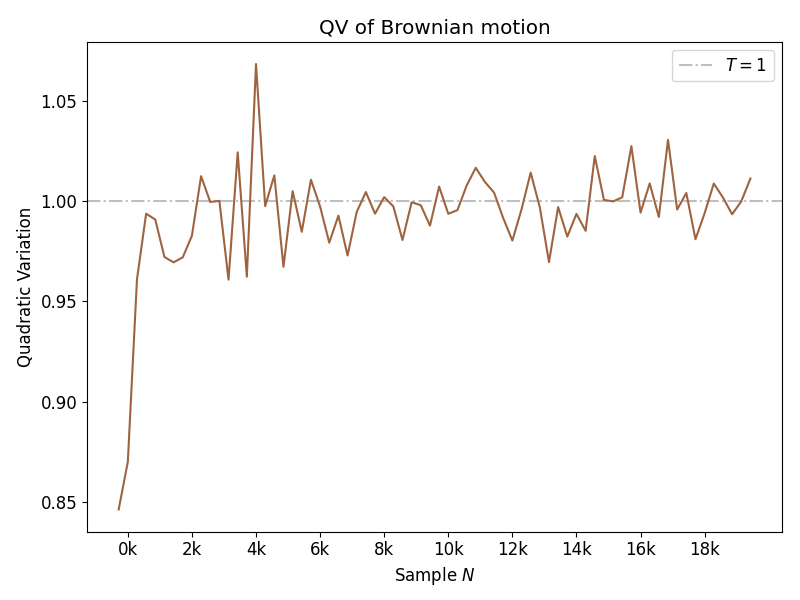

In [10]:
plt.figure('Quadratic Variation')
plt.cla()
cmap = plt.get_cmap('copper')

plt.axhline(y=T, c='grey', alpha=.5, ls='-.', label=f'$T={T}$')
plt.plot(qv_values, color=cmap(0.5))

ticks = np.arange(1, N, 7)
plt.xticks(ticks, ["%dk" % (value/1000) for value in np.array(samples)[ticks]], rotation=0)

plt.legend()
plt.xlabel('Sample $N$')
plt.ylabel('Quadratic Variation') 
plt.title(f'QV of Brownian motion')
plt.tight_layout()
plt.show()